# Car Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Importing the CSV file

In [2]:
car_data=pd.read_csv('CarPrice_Assignment.csv')
car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### First five Rows and Columns

In [4]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Information about the Dataset

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Column Names

In [6]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Checking the Null Values

In [7]:
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Data have no null Values

### Checking for Duplicates

In [8]:
car_data.duplicated().sum()

0

#### No duplicates in the dataset

### Checking the Shape Of The Dataset

In [10]:
car_data.shape

(205, 26)

In [12]:
car_data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

### Checking the Unique Values in dataset

In [13]:
for col in df.columns:
    print("Unique values of"+ col)
    print(car_data[col].unique())
    print("=============*****==============\n")
    

Unique values ofcar_ID
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
=============*****==============

Unique values ofsymboling
[ 3  1  2  0 -1 -2]
=============*****==============

Unique values ofCarName
['alfa

### Unique value count

In [17]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

### Splitting Carname from company name

In [18]:
CompanyName = car_data['CarName'].apply(lambda x : x.split(' ')[0])
car_data.insert(3,"CompanyName",CompanyName)
car_data.head()

,car_ID,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Checking the Company name After spliting

In [19]:
car_data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [44]:
car_data['CompanyName'] = car_data['CompanyName'].replace({
    'alfa-romero': 'Alfa Romeo',
    'audi': 'Audi',
    'bmw': 'BMW',
    'chevrolet': 'Chevrolet',
    'dodge': 'Dodge',
    'honda': 'Honda',
    'isuzu': 'Isuzu',
    'jaguar': 'Jaguar',
    'maxda': 'Mazda',  
    'buick': 'Buick',
    'mercury': 'Mercury',
    'mitsubishi': 'Mitsubishi',
    'Nissan': 'Nissan',  
    'nissan': 'Nissan',  
    'peugeot': 'Peugeot',
    'plymouth': 'Plymouth',
    'porsche': 'Porsche',
    'renault': 'Renault',
    'saab': 'Saab',
    'subaru': 'Subaru',
    'toyota': 'Toyota',
    'vokswagen': 'Volkswagen',  
    'volkswagen': 'Volkswagen',
    'volvo': 'Volvo',
    'toyouta': 'Toyota',  
    'vw': 'Volkswagen'  
})


In [45]:
car_data.CompanyName.unique()

array(['Alfa Romeo', 'Audi', 'BMW', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'mazda', 'Buick', 'Mercury', 'Mitsubishi',
       'Nissan', 'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab',
       'Subaru', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

### Overall Statistics about the DataSet

In [14]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Checking the Numerical and Categorical columns

In [15]:
numerical_cols = car_data.select_dtypes(include=['number']).columns
categorical_cols = car_data.select_dtypes(include=['object']).columns

print("Numerical Columns:")
print(numerical_cols)
print("\nCategorical Columns:")
print(categorical_cols)

Numerical Columns:
Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Categorical Columns:
Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


### Dropping the Car ID column

In [46]:
df.drop('car_ID',axis=1,inplace=True)
df

,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,Alfa Romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,Alfa Romeo,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,Alfa Romeo,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,Audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,Audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),Volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,Volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,Volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,Volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


## Visualizing The Data

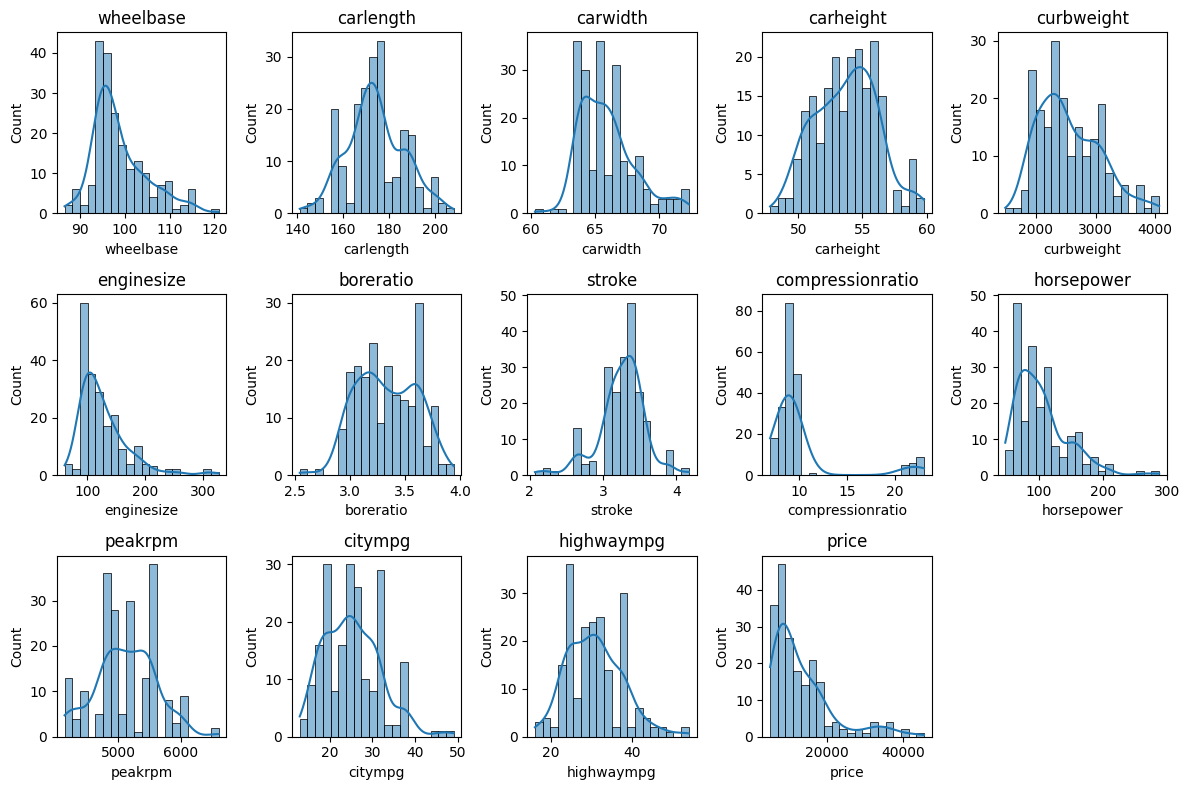

In [50]:
numerical_column = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

plt.figure(figsize=(15, 8))
for feature in numerical_column:
    plt.subplot(3, 5, numerical_column.index(feature) + 1)
    sns.histplot(data=car_data[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

### Scatter plot relation ship between price and numerical column

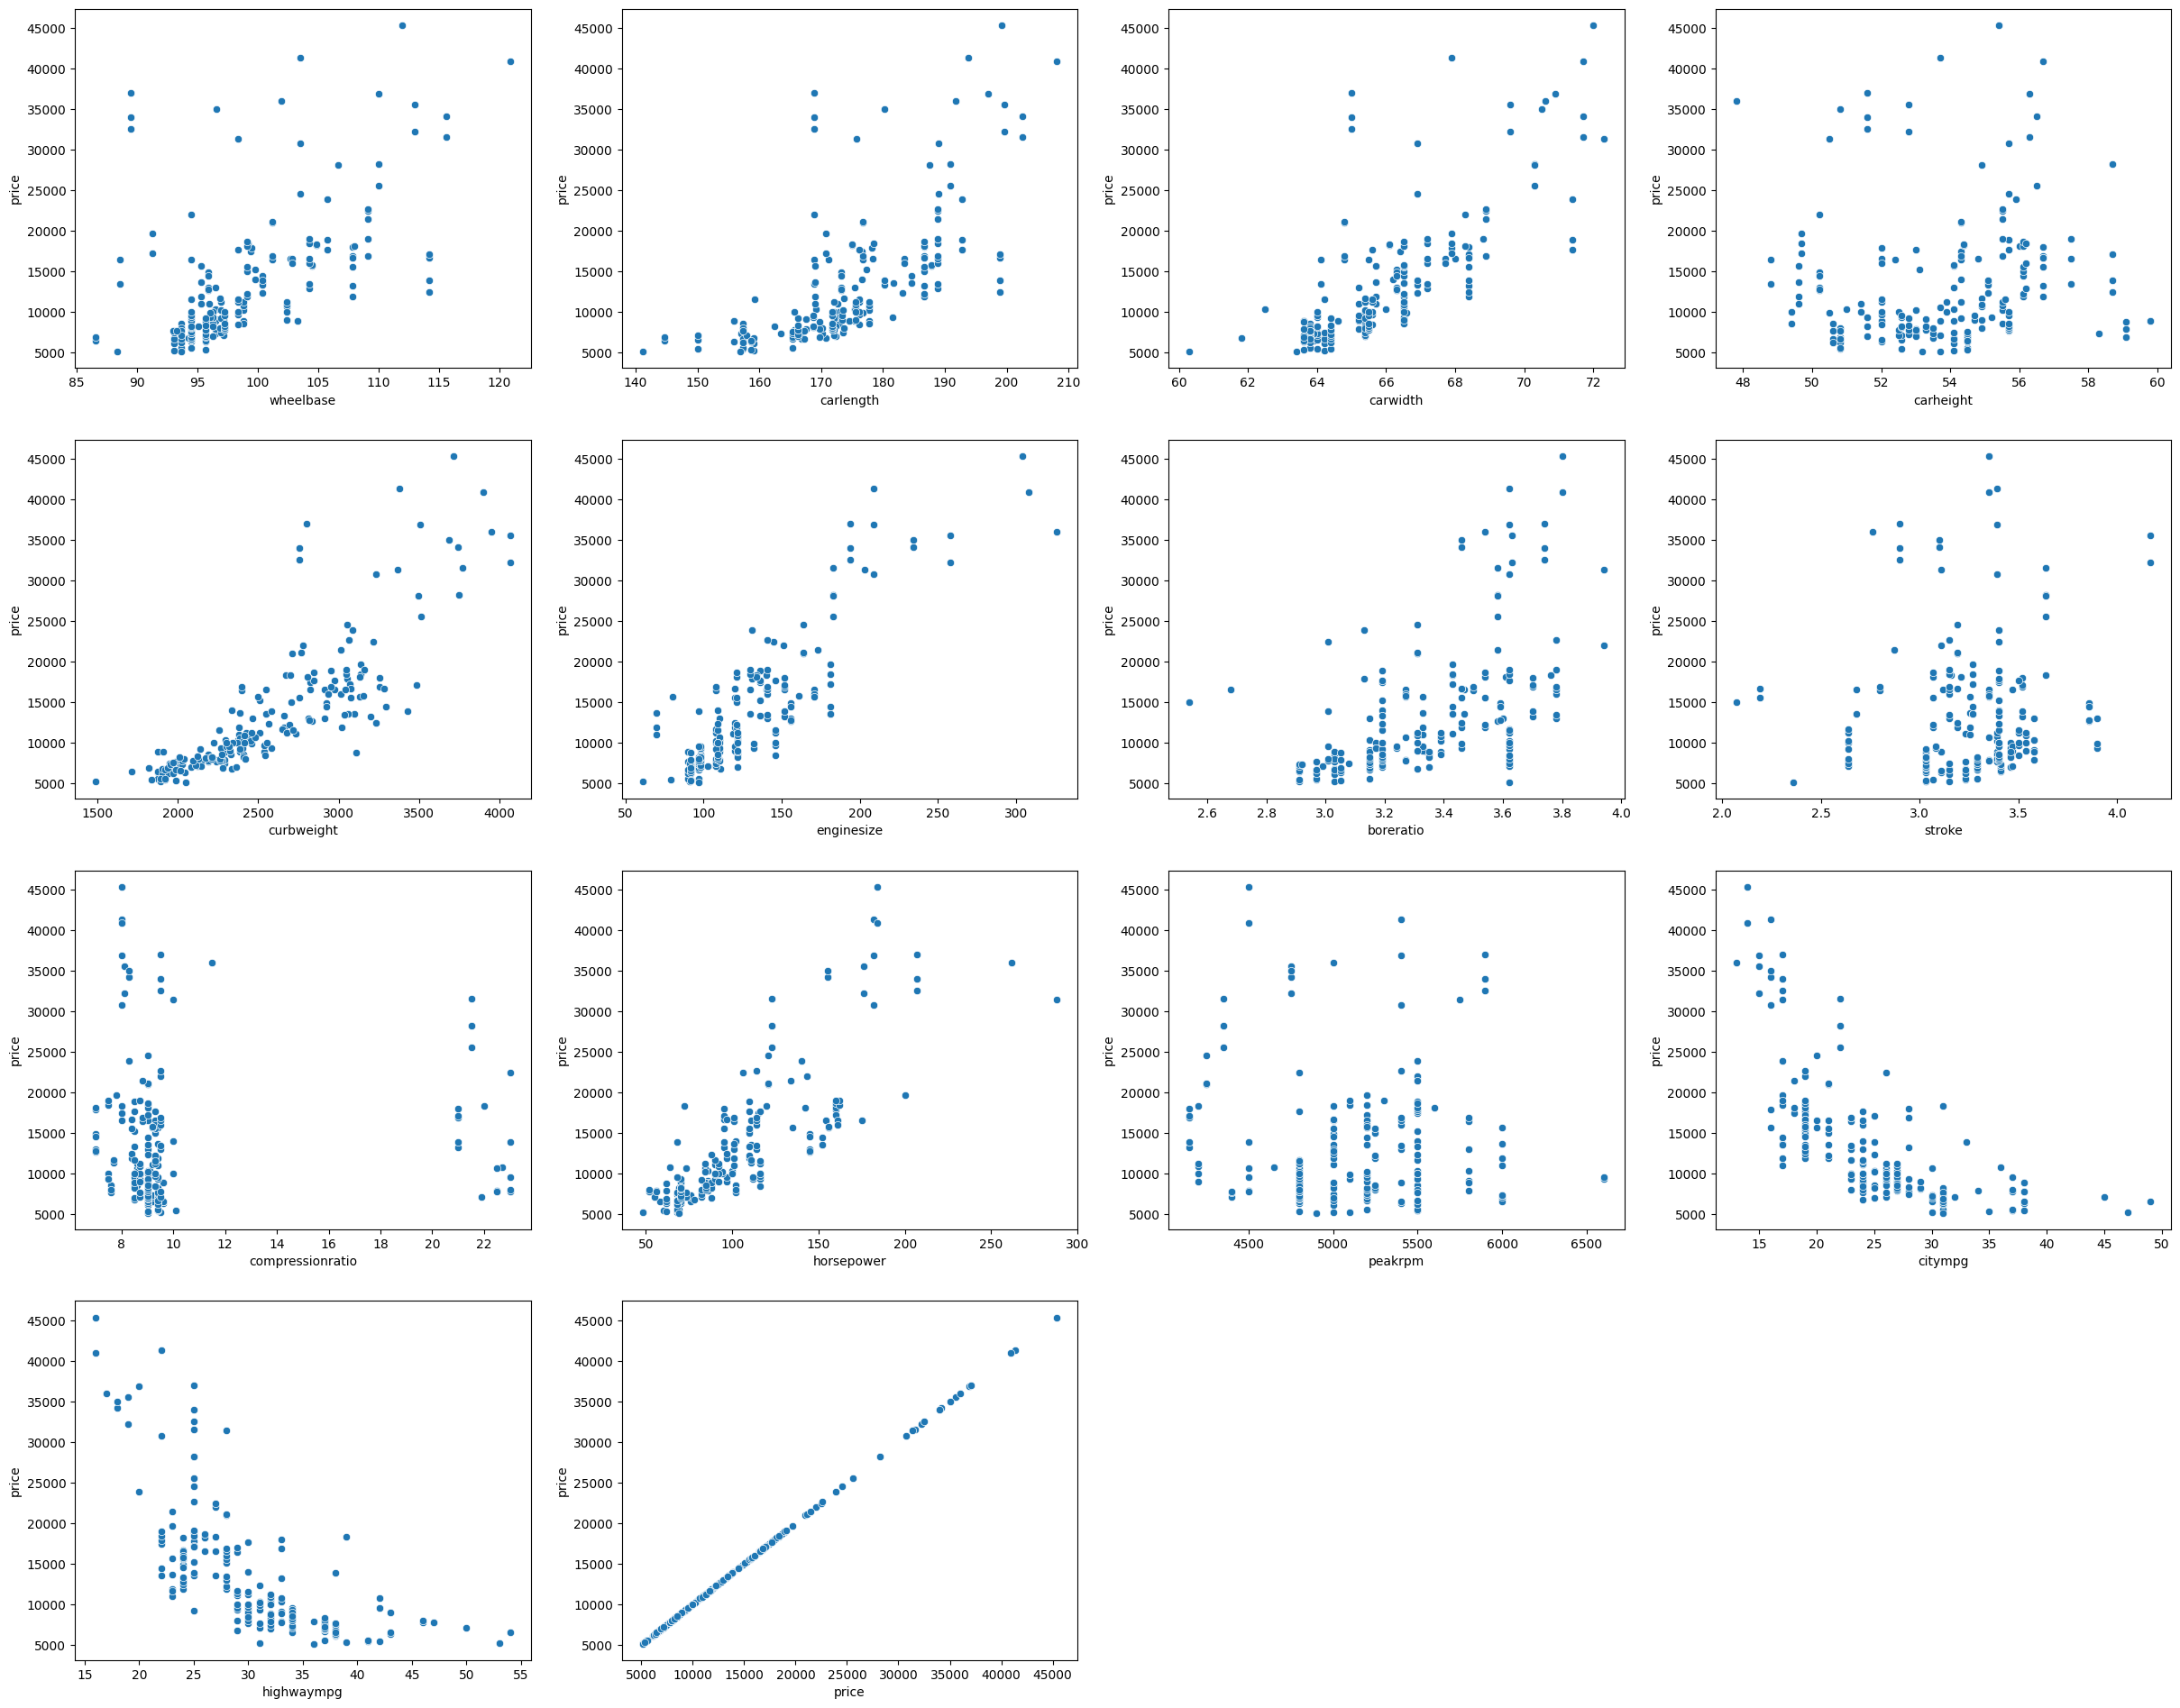

In [53]:
numerical_column = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

fig = plt.figure(figsize=(30,30))
counter = 0

for col in numerical_column:
    fig.add_subplot(5,4,counter+1)
    sns.scatterplot(data=df,x=col,y='price')
    plt.xlabel(col)
    counter = counter + 1

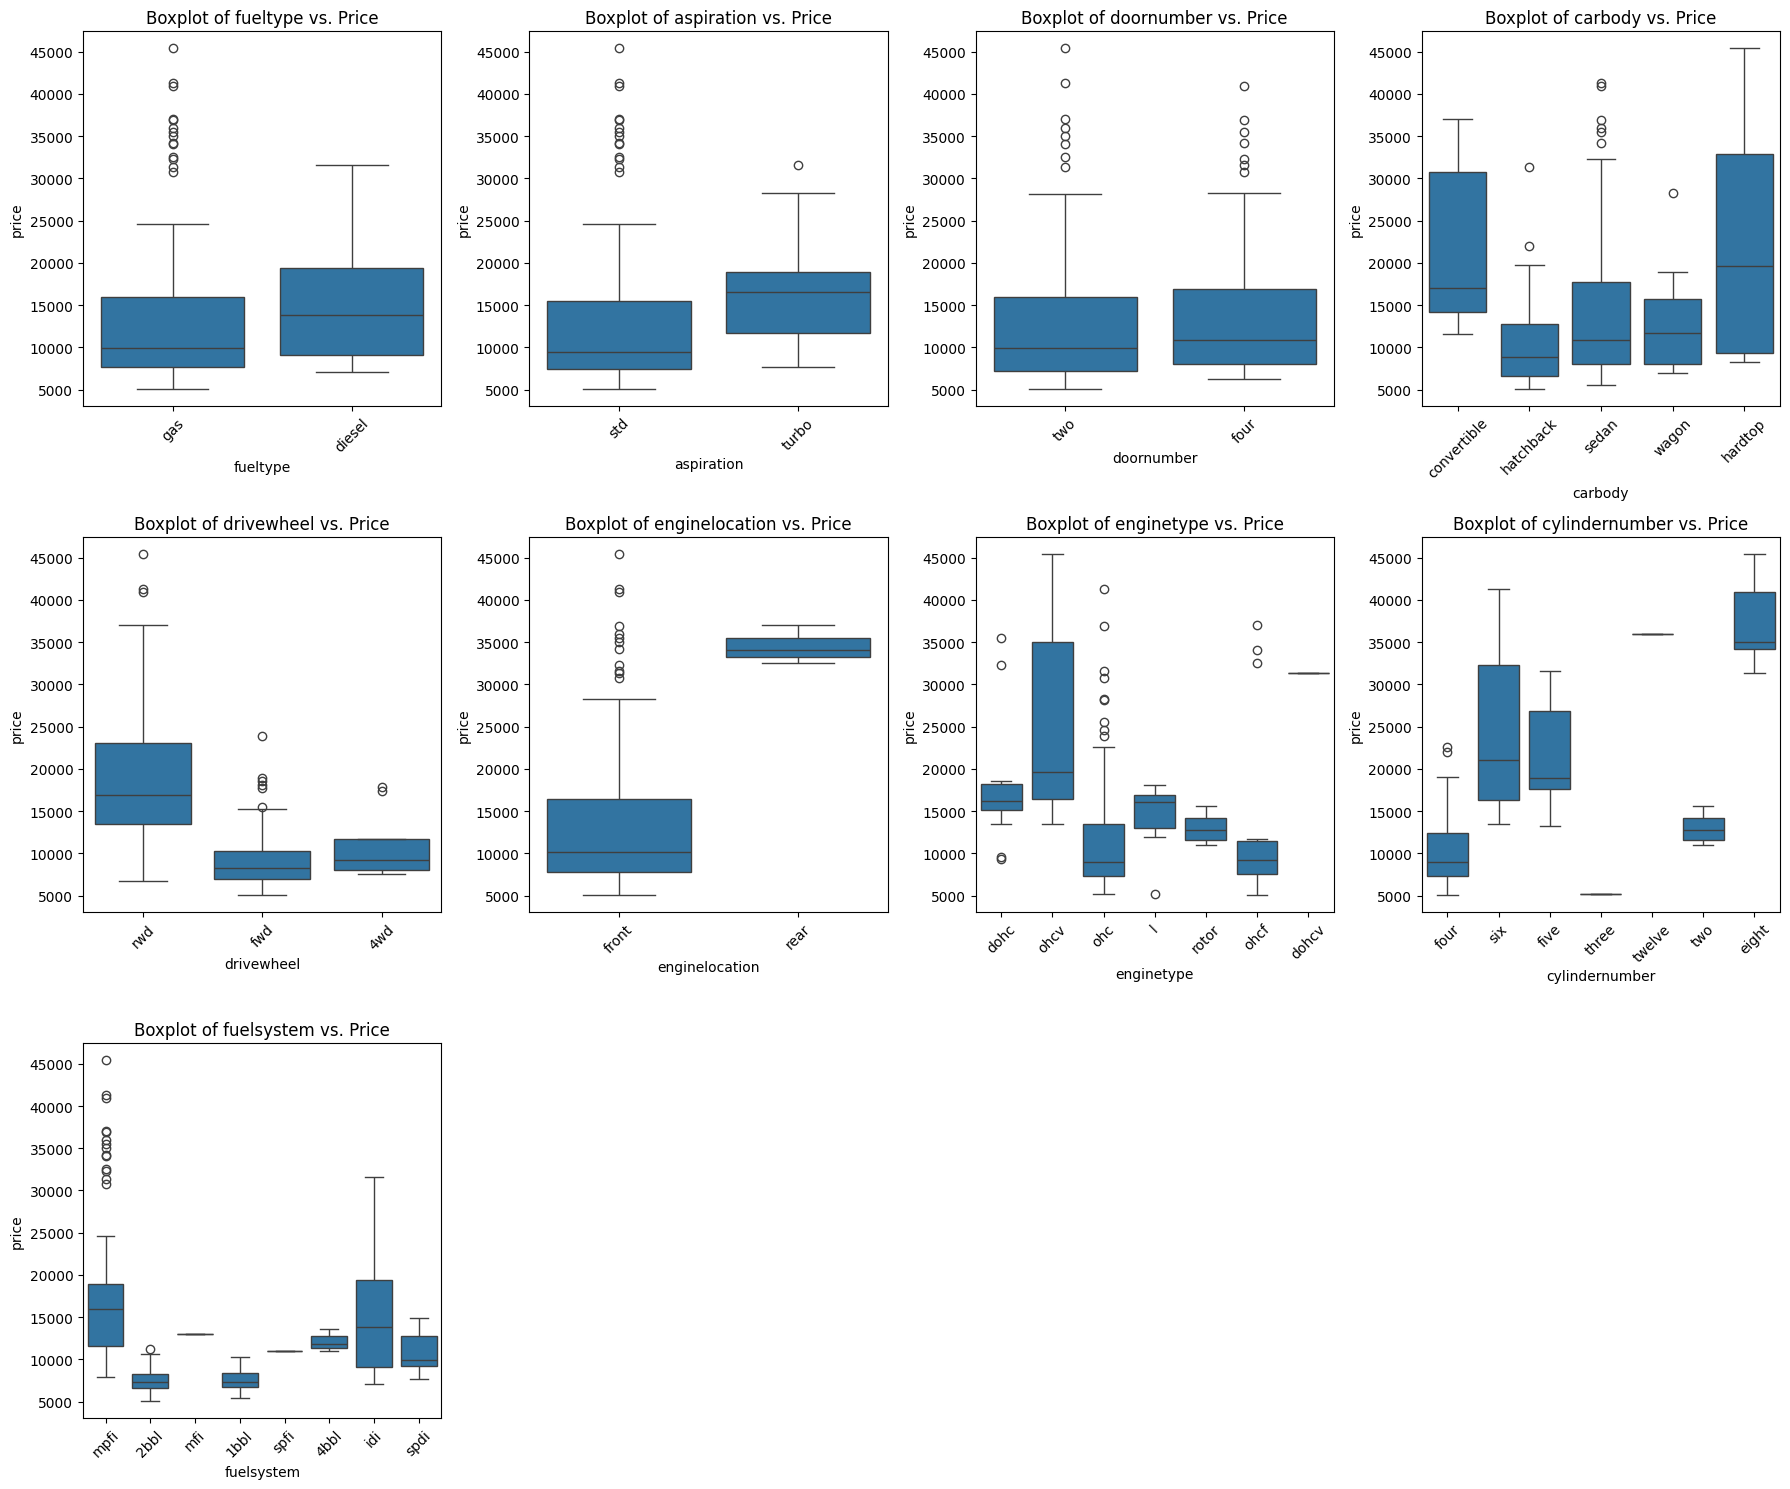

In [57]:
categorical_data=['fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem']
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_data):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'Boxplot of {col} vs. Price')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Average price Based On Company Name

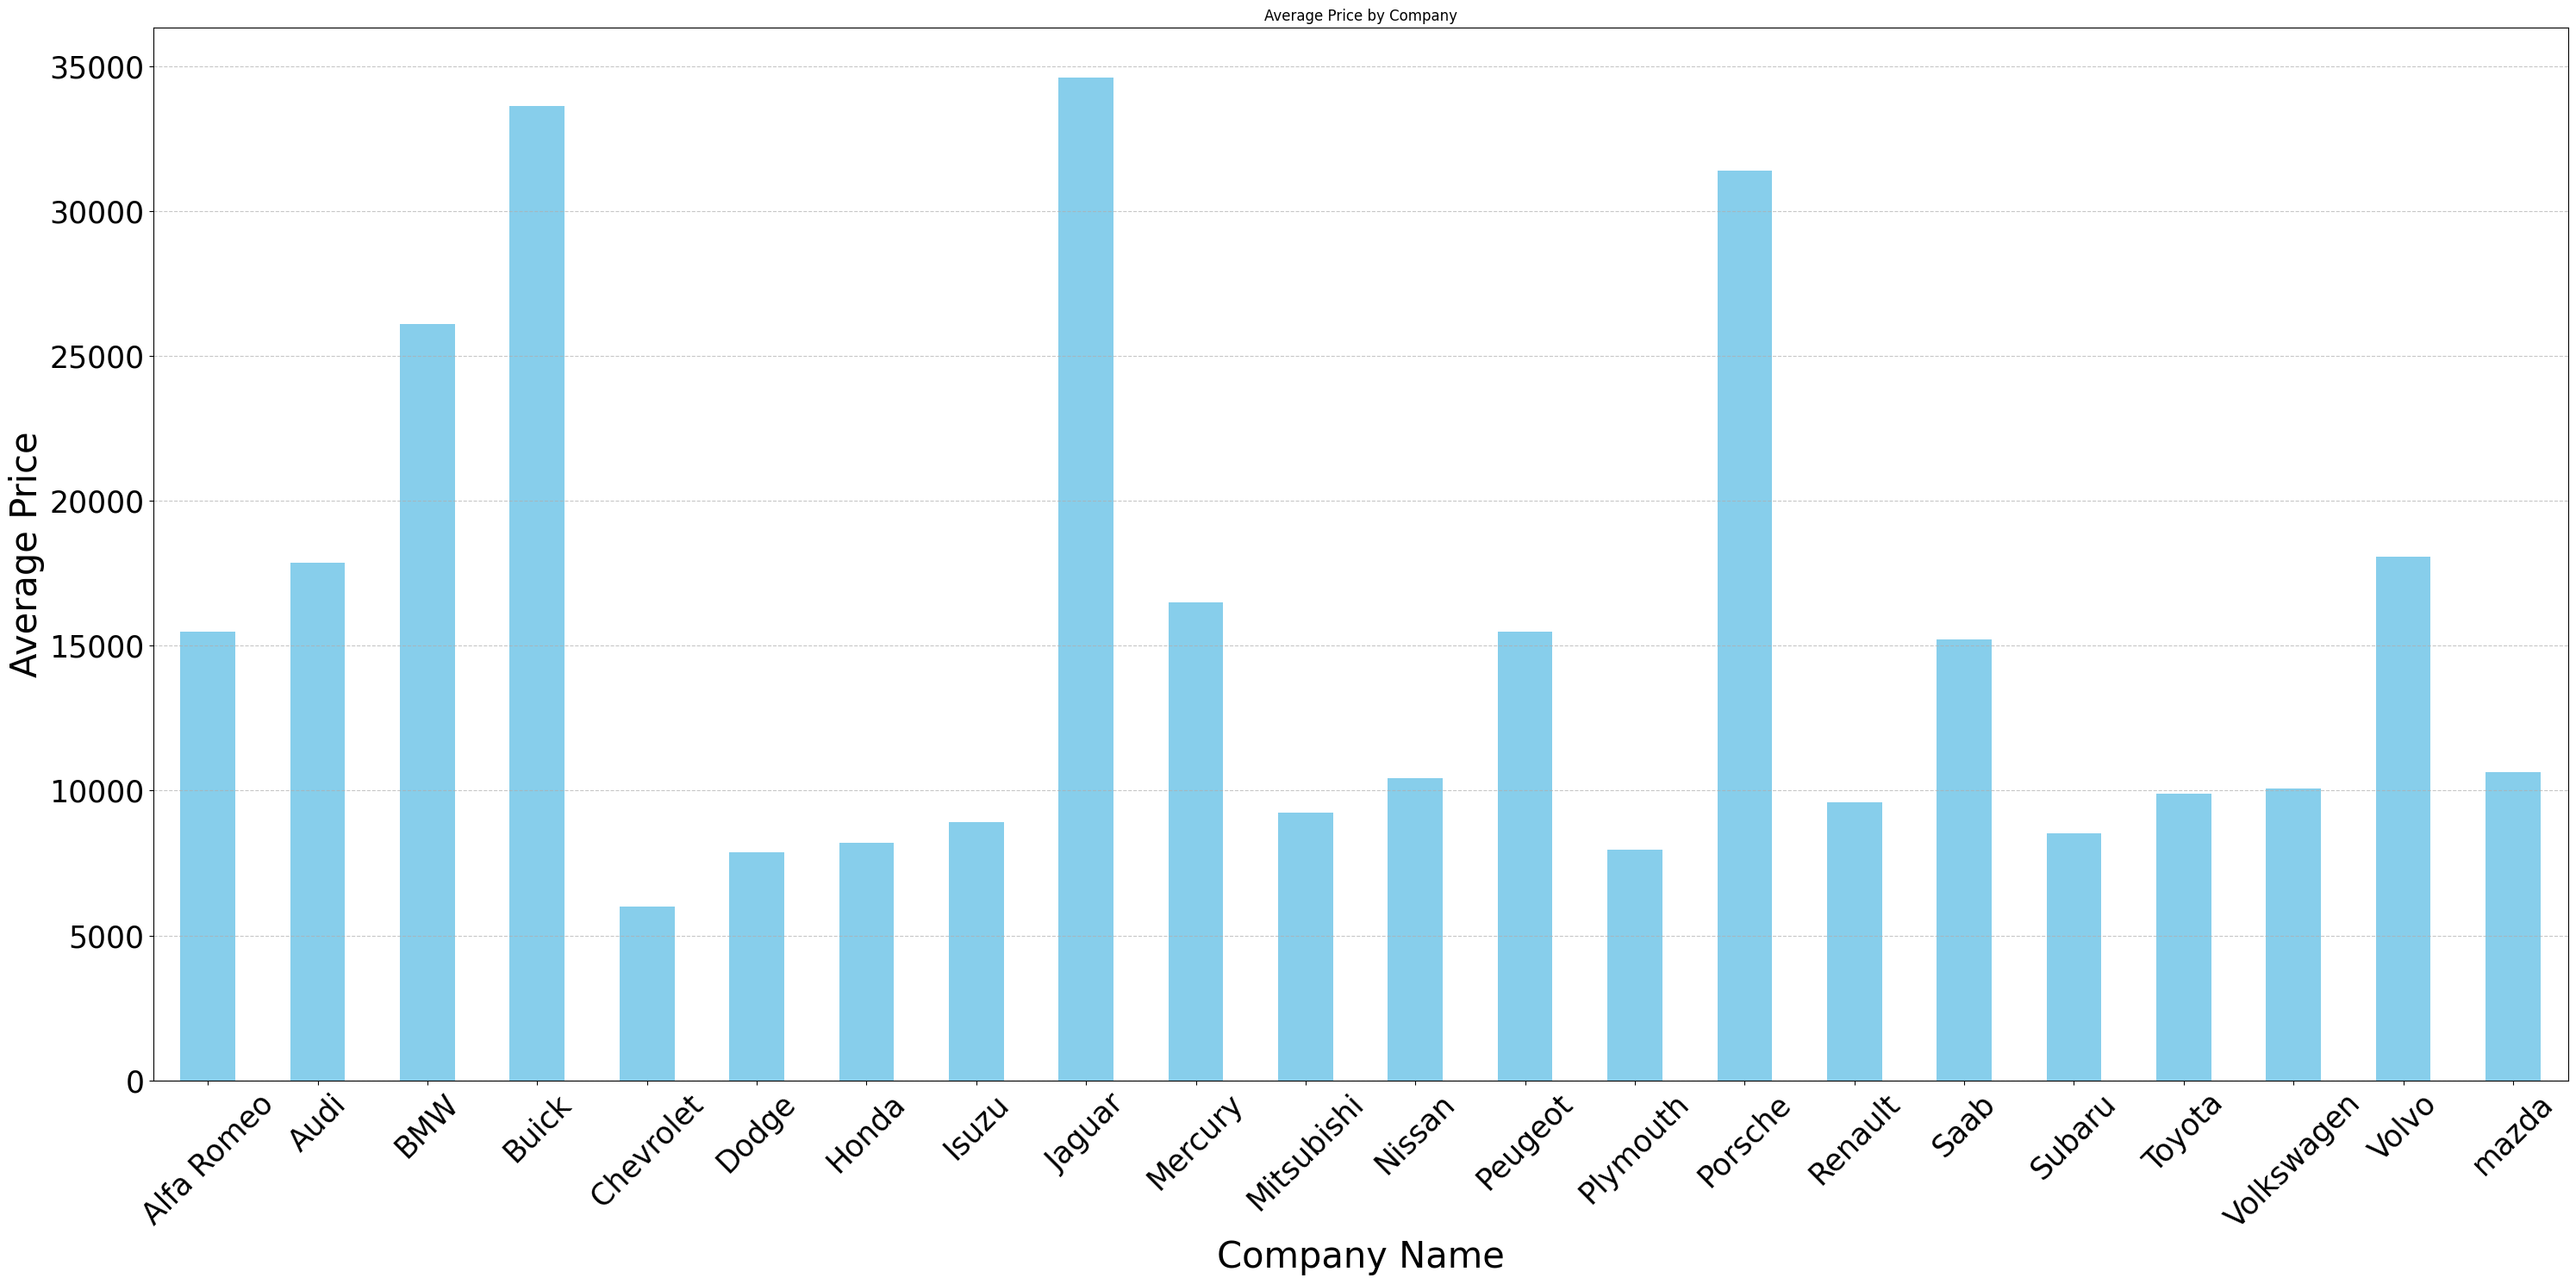

Average US car price:  13276.710570731706


In [70]:
average_prices = car_data.groupby('CompanyName')['price'].mean()

# Plot the bar chart
plt.figure(figsize=(30, 15))
average_prices.plot(kind='bar', color='skyblue',fontsize=25)
plt.title('Average Price by Company')
plt.xlabel('Company Name',fontsize=30)
plt.ylabel('Average Price',fontsize=30)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.tight_layout() 
plt.show()

print('Average US car price: ',df['price'].mean())

### Comparing the Fuel type with price average

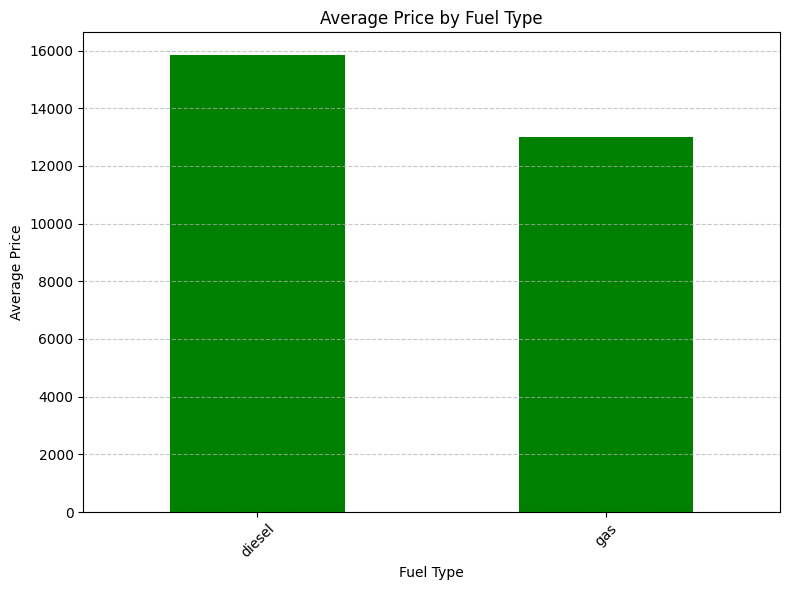

Diesel Enghine Have the Highest Price


In [75]:
average_prices = df.groupby('fueltype')['price'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
average_prices.plot(kind='bar', color='green')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Diesel Enghine Have the Highest Price")

In [76]:
corr_matrix=df[numerical_column].corr()
corr_matrix

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


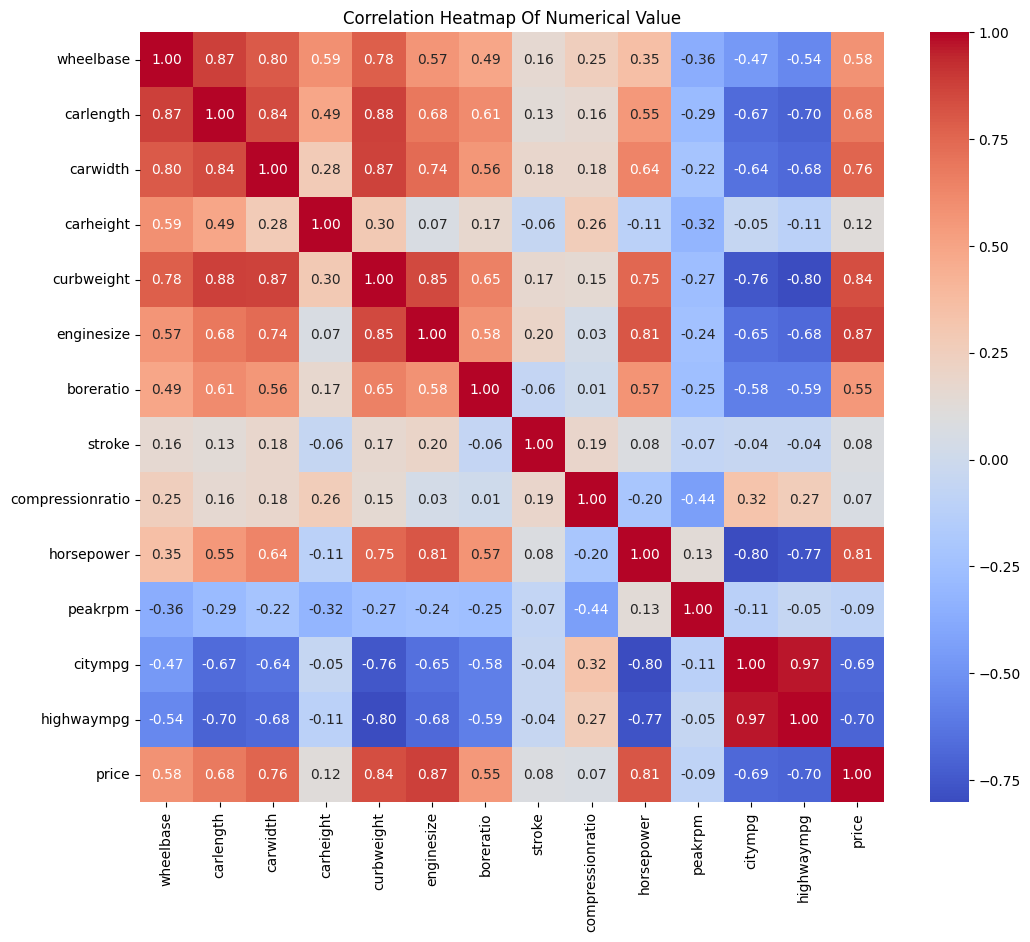

In [77]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True ,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap Of Numerical Value')
plt.show()

#### Areas highlighted in warmer tones indicate strong positive correlations between the corresponding variables. These relationships suggest that as one variable increases, the other tends to increase as well. highly correlated columns (where correlation>0.85)

## Outliers

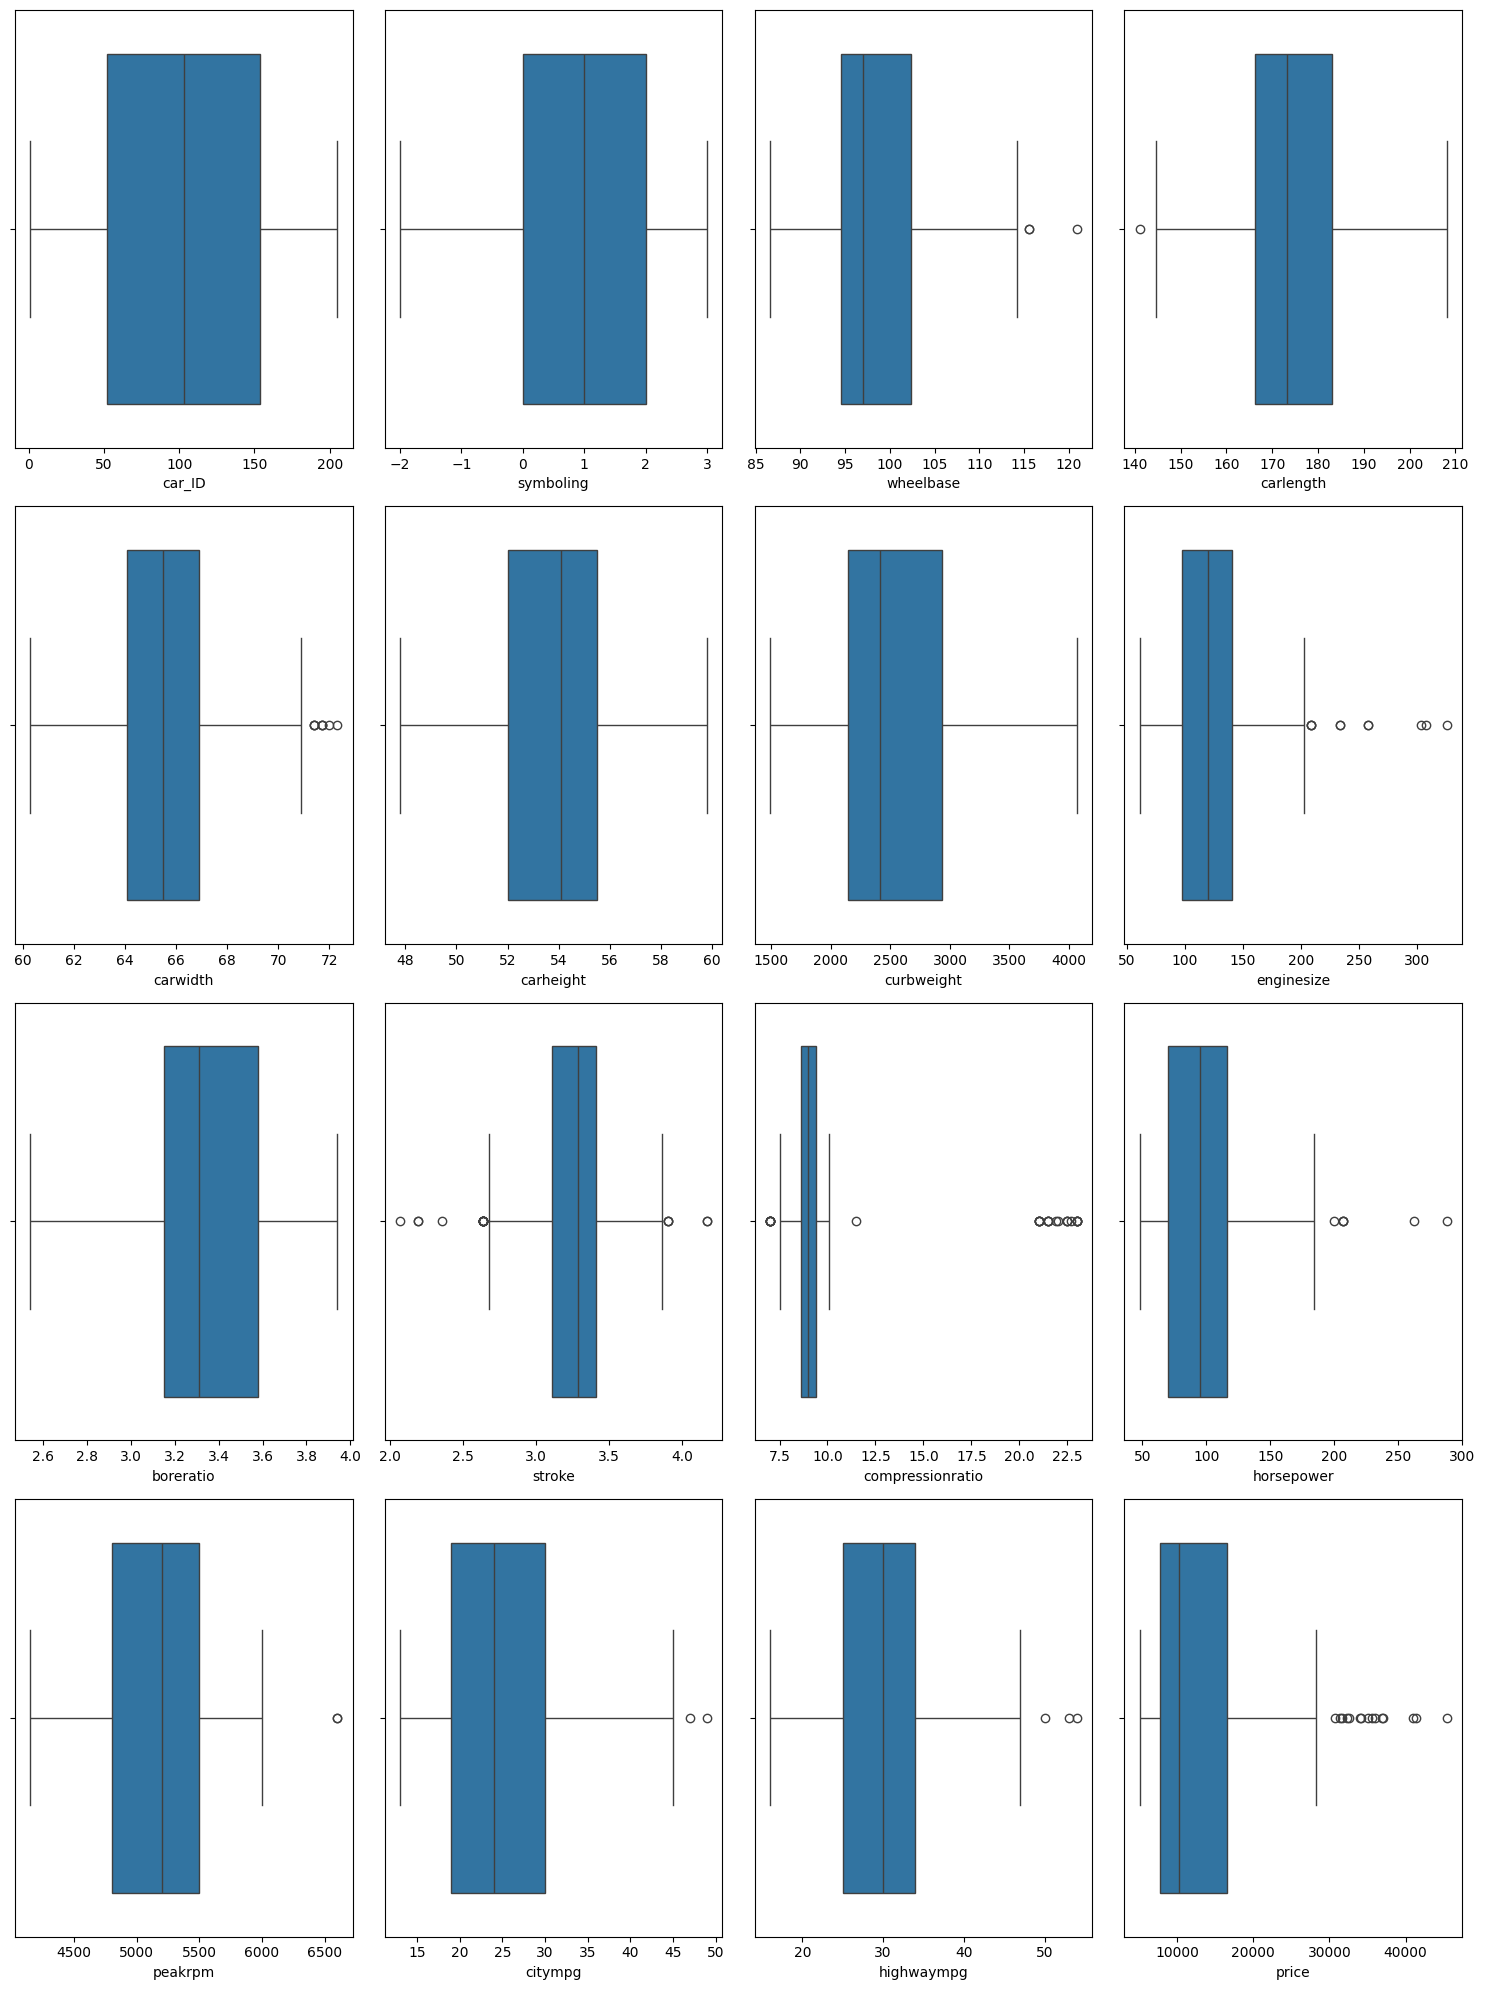

In [78]:
fig, axes = plt.subplots(4, 4, figsize=(15, 20))  
counter = 0
for col in df.select_dtypes(include="number").columns:
    sns.boxplot(x=df[col], ax=axes[counter // 4, counter % 4])
    axes[counter // 4, counter % 4].set_xlabel(col)
    counter += 1

plt.tight_layout()
plt.show()

### Here we have Outliers 

### Checking the Quartile

In [94]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

### Checking the Outliers

In [98]:
for i in car_data.select_dtypes(include="number").columns:
    lw,uw=whisker(car_data[i])
    car_data[i]=np.where(car_data[i]<lw,lw,car_data[i])
    
    car_data[i]=np.where(car_data[i]>uw,uw,car_data[i])  

### Visualising the Box plot After removing the Outliers

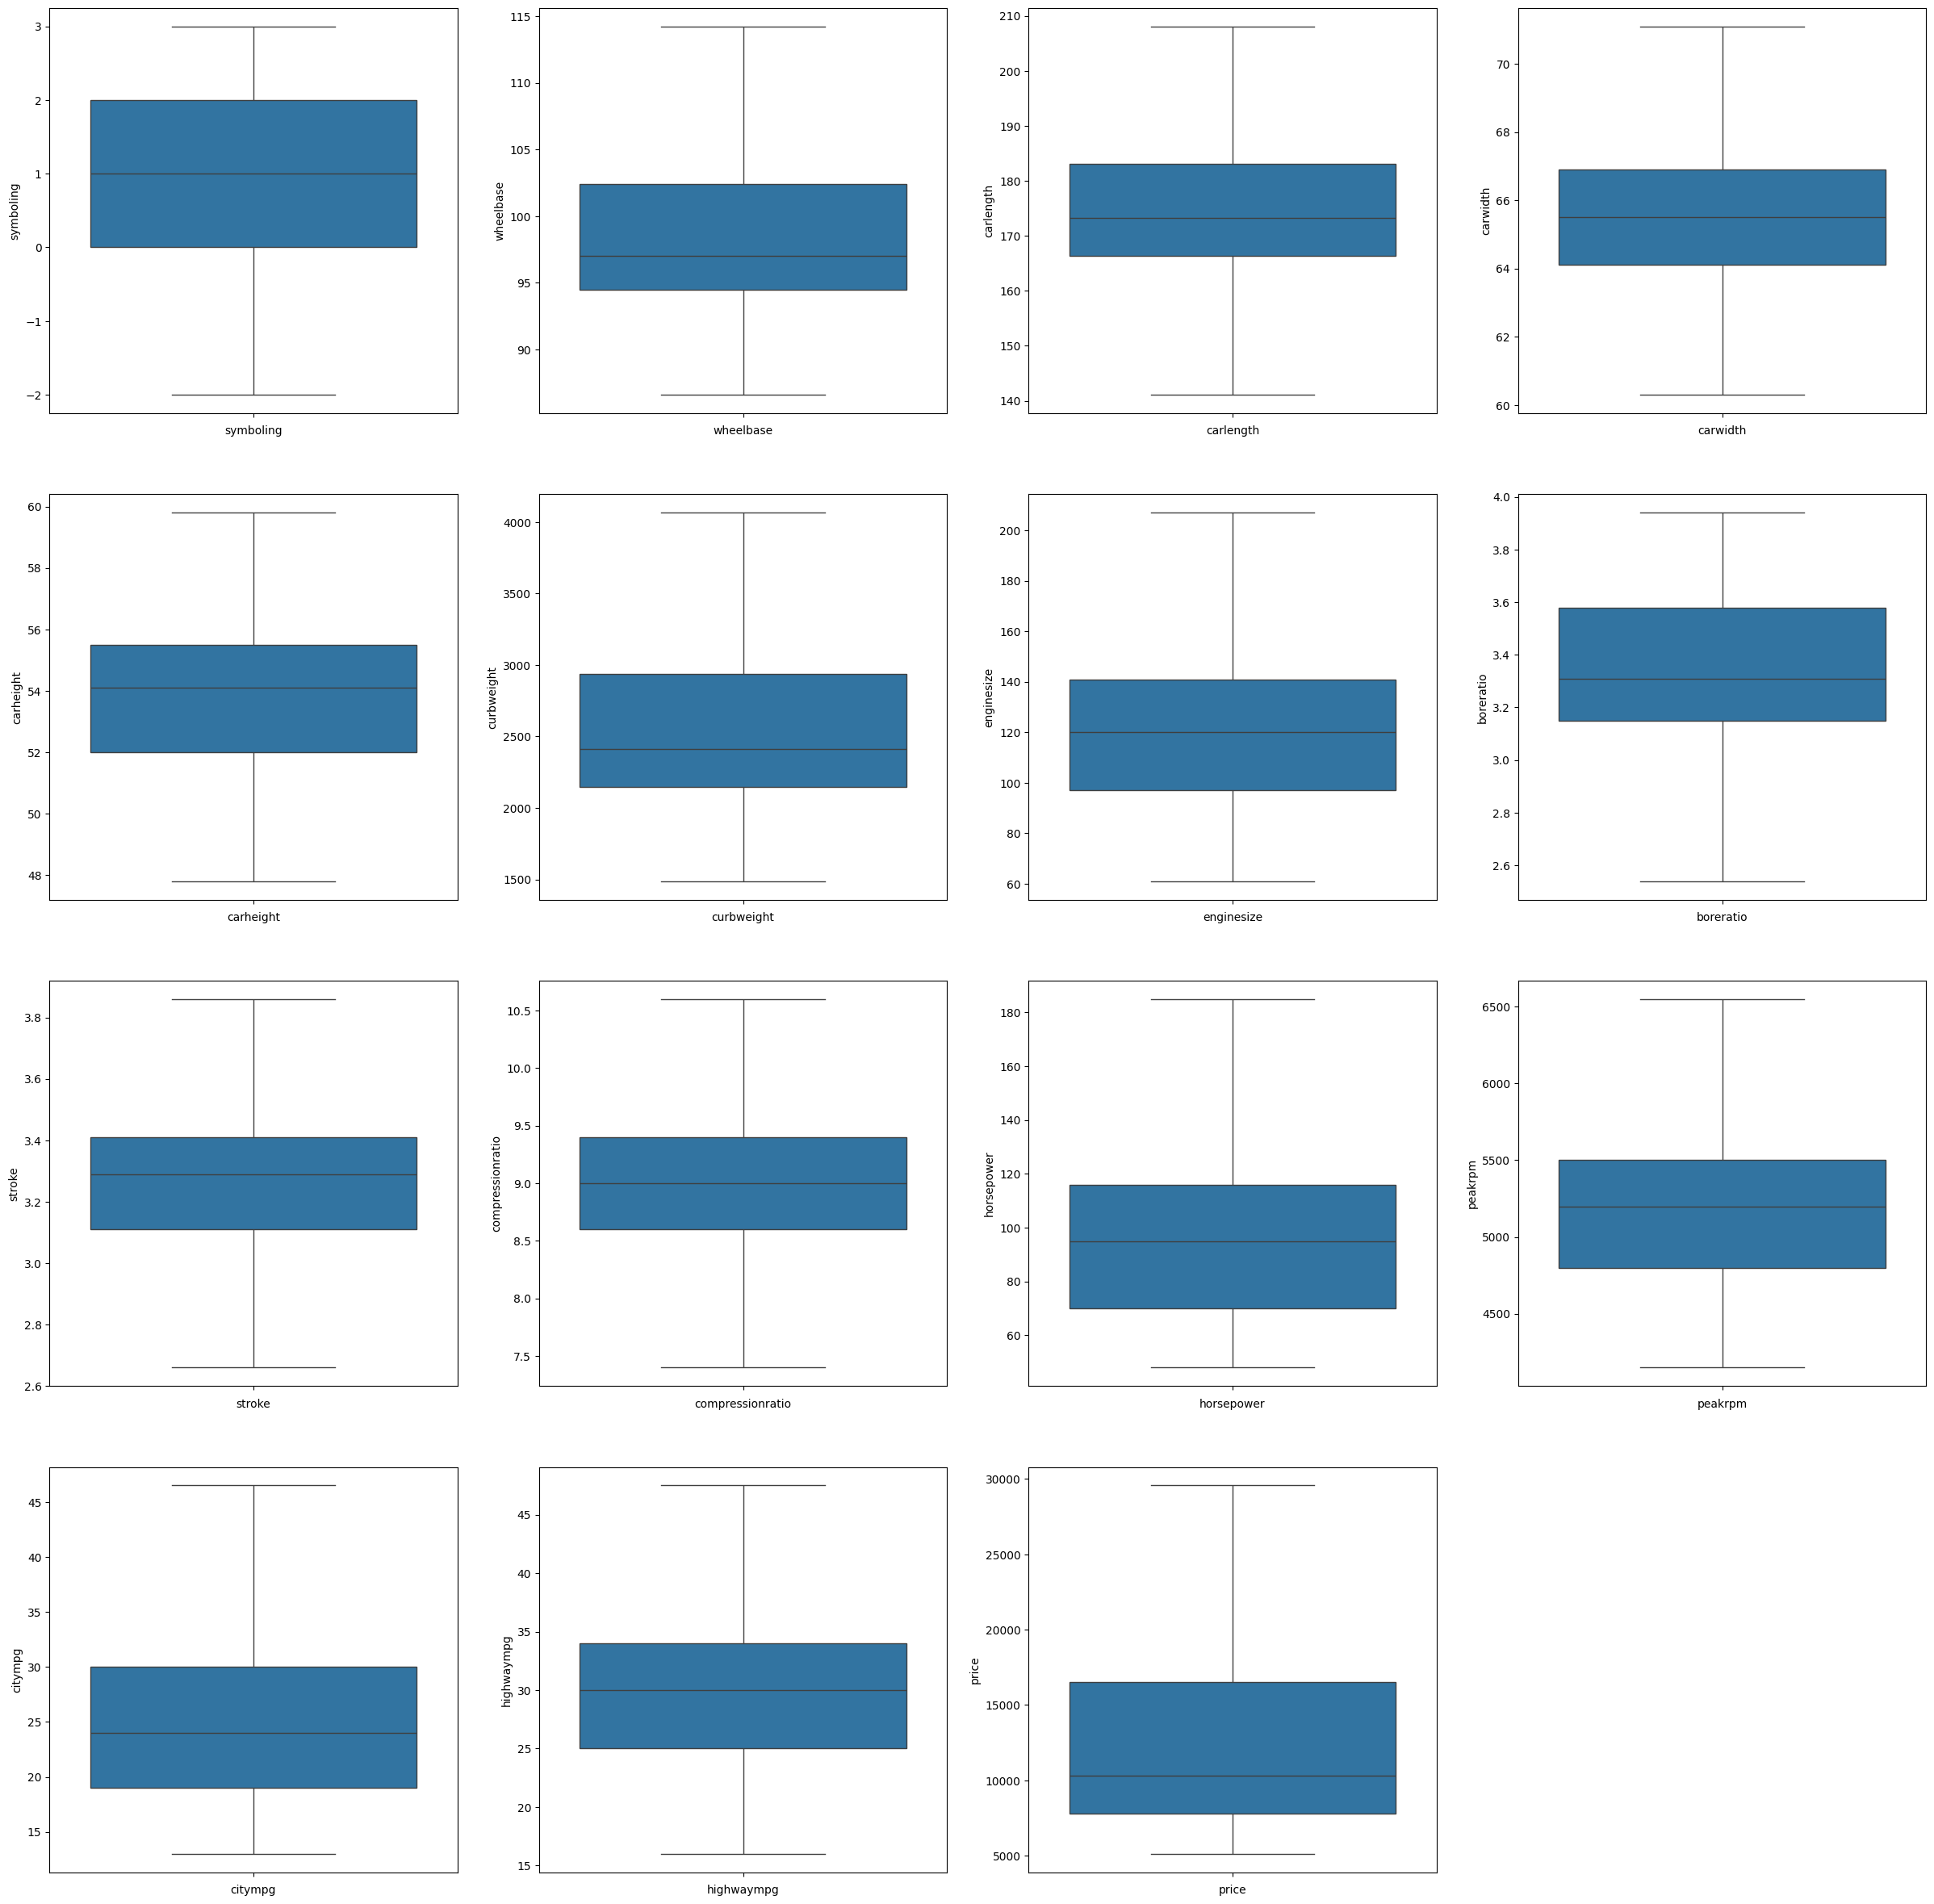

In [99]:
#box plot to identify outliers
fig = plt.figure(figsize=(30,30))
counter = 0

for col in car_data.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=car_data[col])
    plt.xlabel(col)
    counter = counter + 1

### Label Encoding

In [147]:
categorical_column=df.select_dtypes(include=['object']).columns
                     
categorical_column
label_encoder = LabelEncoder()
#This line creates an instance of the LabelEncoder class, which will be used to encode categorical variables.

for column in categorical_column:
    df[column]=label_encoder.fit_transform(df[column])

### Feature Scaling

In [153]:

# Feature scaling
#Standard Scaling
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### Split the dataset into training and testing sets

In [13]:
#splitting the data
# X should contain the features used for prediction, and y should contain the target variable
X = car_data.drop(columns=['price'])  # Features
y = car_data['price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (164, 25)
Shape of X_test: (41, 25)
Shape of y_train: (164,)
Shape of y_test: (41,)


### 1.Linear Regression

In [154]:
model=LinearRegression()
model.fit(X_train,y_train)

Shape of X_train: (164, 35)
Shape of X_test: (41, 35)
Shape of y_train: (164,)
Shape of y_test: (41,)


LinearRegression()

In [157]:
#intercept
intercept=model.intercept_
intercept

7727.974777130963

In [158]:
coefficients=model.coef_
coefficients

array([   19.66954725,   166.69954509,   -27.56155324,  4939.09233616,
         540.92379442,  -769.88898626,  -563.83763554,   401.33459916,
        5756.46927399,  1057.21444405,  -757.80958661,  1242.81187725,
         500.31355391,  1460.58549071,   117.84673849,   -52.50500659,
        3271.17458571,    51.44943424,  -199.57859101,  -610.52626484,
        3356.97179242,   717.37202739,   653.33533002, -1142.95359853,
         724.43253439,   -27.56155324,  4939.09233616,   540.92379442,
        -769.88898626,  -563.83763554,   401.33459916,  5756.46927399,
         117.84673849,   -52.50500659,    51.44943424])

In [159]:
y_predicted_train=model.predict(X_train)

In [160]:
y_predicted_test=model.predict(X_test)
y_predicted_test

array([25783.25418642, 17590.19034007,  9749.41774329, 13344.41148125,
       27280.94377292,  6357.70028107,  8713.26230338,  5734.28057726,
        9449.29974282,  7106.92604731, 13742.38737314,  5979.00747713,
       16651.11471939, 10552.79250236, 40457.1636125 ,  6710.72559894,
         484.11999496, 14240.99382584,  9727.97223046, 10460.90898101,
       10941.50660196, 21136.81726627,  8177.97185747,  3244.00794152,
        7777.92851044, 24504.52472833, 14092.94909723, 15826.15799989,
        5244.08940192, 16102.44725101, 27166.32467284,  7239.59071361,
        4578.17478895, 22177.76526526,  8255.66494855, 27497.23172714,
       10063.67575722,  9984.91341199,  6800.48179645, 14644.70979449,
        7421.77429317])

In [161]:
x_train.iloc[0]

symboling                     0.0
CarName             mazda rx-7 gs
CompanyName                 mazda
fueltype                   diesel
aspiration                    std
doornumber                   four
carbody                     sedan
drivewheel                    rwd
enginelocation              front
wheelbase                   104.9
carlength                   175.0
carwidth                     66.1
carheight                    54.4
curbweight                 2700.0
enginetype                    ohc
cylindernumber               four
enginesize                  134.0
fuelsystem                    idi
boreratio                    3.43
stroke                       3.64
compressionratio             10.6
horsepower                   72.0
peakrpm                    4200.0
citympg                      31.0
highwaympg                   39.0
Name: 66, dtype: object

### Evaluating the Regression Model

In [163]:
mse = mean_squared_error(y_test, y_predicted_test)
r2_square = r2_score(y_test,y_predicted_test)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.8441158536668149
Mean Squared Error: 12306121.302934581


In [164]:
mse = mean_squared_error(y_train, y_predicted_train)
r2_square = r2_score(y_train,y_predicted_train)
print(f" R-squared: {r2_square}")
print(f'Mean Squared Error: {mse}')

 R-squared: 0.9103545078452818
Mean Squared Error: 5346263.283511501


### Cross Validation

In [170]:

from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_train,y_train,cv=5) #cv=5 no of times divided 
scores

array([0.83653572, 0.89638878, 0.85204593, 0.87166681, 0.86915648])

In [166]:
scores.mean()

0.865158743953647

### 2.Decision Tree Regressor

In [179]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [174]:
tree=DecisionTreeRegressor(max_depth=5)

In [175]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [176]:
predicted_y=tree.predict(X_test)

In [177]:
predicted_y

array([36636.        , 17686.        ,  9876.47222222, 13326.25      ,
       34285.33333333,  6167.2       ,  7898.25      ,  7898.25      ,
        9876.47222222,  7898.25      , 13326.25      ,  7898.25      ,
       13326.25      ,  9876.47222222, 45400.        ,  6167.2       ,
        6167.2       , 13036.5       ,  9876.47222222,  9876.47222222,
        9876.47222222, 17686.        ,  6167.2       ,  6167.2       ,
        7140.67647059, 36636.        ,  9876.47222222, 17686.        ,
        7140.67647059, 17686.        , 34285.33333333,  6167.2       ,
        9876.47222222, 17686.        ,  7898.25      , 34285.33333333,
        9876.47222222, 13326.25      ,  7140.67647059, 13036.5       ,
        9876.47222222])

In [178]:
predicted_ytrain=tree.predict(X_train)

In [180]:
mae=mean_absolute_error(y_test,predicted_y)
mse=mean_squared_error(y_test,predicted_y)
rmse=np.sqrt(mse)
r2=r2_score(y_test,predicted_y)

print(f"mean_absolute_error:{mae}")
print(f"mean_squared_error:{mse}")
print(f"r2_score:{r2}")
print(f"RMSE:{rmse}")

mean_absolute_error:2056.777682289176
mean_squared_error:8894079.457607238
r2_score:0.8873368830406374
RMSE:2982.29432779651


In [181]:
mae=mean_absolute_error(y_train,predicted_ytrain)
mse=mean_squared_error(y_train,predicted_ytrain)
rmse=np.sqrt(mse)
r2=r2_score(y_train,predicted_ytrain)

print(f"mean_absolute_error:{mae}")
print(f"mean_squared_error:{mse}")
print(f"r2_score:{r2}")
print(f"RMSE:{rmse}")

mean_absolute_error:944.3385581061692
mean_squared_error:1903256.1187569743
r2_score:0.968086433006647
RMSE:1379.5854880205773


In [ ]:
scores=cross_val_score(DecisionTree,x_train,y_train,cv=5)

In [189]:
scores

array([0.83653572, 0.89638878, 0.85204593, 0.87166681, 0.86915648])

In [190]:
scores.mean()

0.865158743953647

### Evaluation 